In [ ]:
from google.colab import files
files.upload()   # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{\r\n  "username": "project",\r\n  "key": "KGAT_099e98bd3a3e47ec535571ae54f30d1c"\r\n}\r\n'}

In [ ]:
!pip install kaggle librosa numpy matplotlib tensorflow tqdm scikit-learn


In [ ]:
import os

os.makedirs("/root/.kaggle", exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

print("Kaggle API configured successfully")


Kaggle API configured successfully


In [ ]:
!kaggle datasets list | head


ref                                                  title                                           size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------  ----------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/wind-and-solar-energy-production-dataset  Wind & Solar Energy Production Dataset        395372  2026-01-02 21:06:22.780000              0         28  1.0              
neurocipher/heartdisease                             Heart Disease                                   3491  2025-12-11 15:29:14.327000           2114        188  1.0              
kundanbedmutha/exam-score-prediction-dataset         Exam Score Prediction Dataset                 325454  2025-11-28 07:29:01.047000           5863        234  1.0              
ishank2005/salary-csv                                Salary.csv                                       392

In [ ]:
!kaggle datasets download -d abdulvahap/music-instrunment-sounds-for-classification


Dataset URL: https://www.kaggle.com/datasets/abdulvahap/music-instrunment-sounds-for-classification
License(s): apache-2.0
100% 4.59G/4.59G [00:48<00:00, 248MB/s]
100% 4.59G/4.59G [00:48<00:00, 102MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p /content/drive/MyDrive/InstruNetAI


In [ ]:
!mv music-instrunment-sounds-for-classification.zip /content/drive/MyDrive/InstruNetAI/


In [ ]:
!ls /content/drive/MyDrive/InstruNetAI


music-instrunment-sounds-for-classification.zip


In [ ]:
!unzip /content/drive/MyDrive/InstruNetAI/music-instrunment-sounds-for-classification.zip \
-d /content/drive/MyDrive/InstruNetAI/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/53.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/530.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/531.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/532.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/533.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/534.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/535.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/536.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/537.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/538.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/539

In [ ]:
!ls /content/drive/MyDrive/InstruNetAI/dataset


music_dataset


In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
DATASET_PATH = "/content/drive/MyDrive/InstruNetAI/dataset"

SAMPLE_RATE = 22050
N_MELS = 128
FIXED_LENGTH = 128   # time dimension for CNN



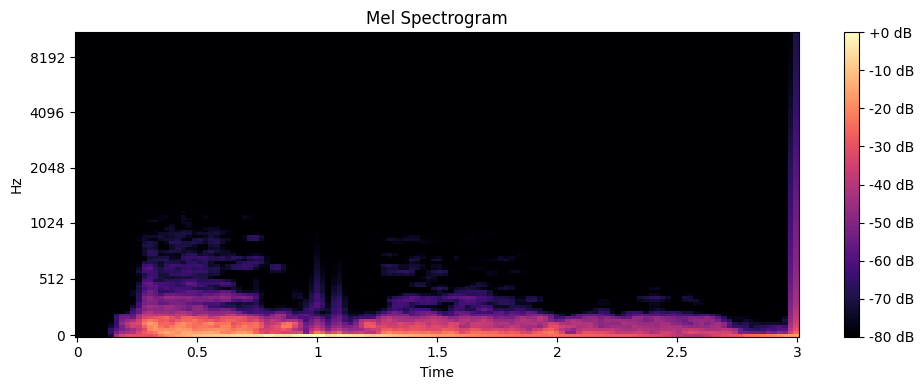

In [ ]:
AUDIO_PATH = "/content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Electro_Guitar"

audio_file = os.listdir(AUDIO_PATH)[0]
audio_path = os.path.join(AUDIO_PATH, audio_file)

audio, sr = librosa.load(audio_path, sr=SAMPLE_RATE)

mel = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_mels=N_MELS
)

mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10,4))
librosa.display.specshow(
    mel_db,
    sr=sr,
    x_axis='time',
    y_axis='mel'
)
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.tight_layout()
plt.show()


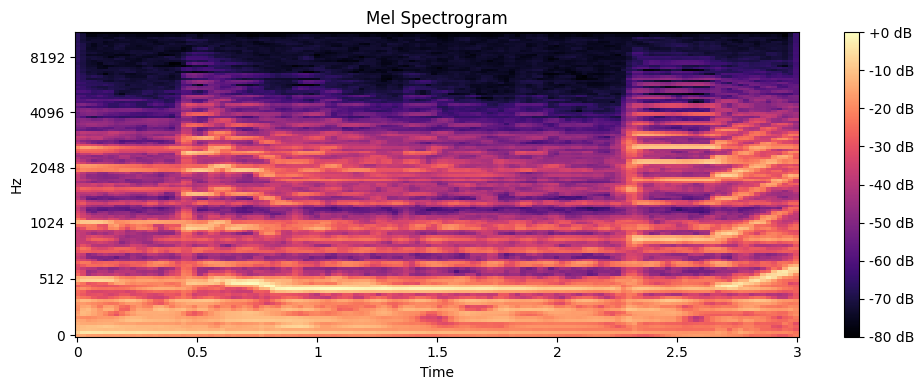

In [ ]:
AUDIO_PATH = "/content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Electro_Guitar"

audio_file = os.listdir(AUDIO_PATH)[1]
audio_path = os.path.join(AUDIO_PATH, audio_file)

audio, sr = librosa.load(audio_path, sr=SAMPLE_RATE)

mel = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_mels=N_MELS
)

mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10,4))
librosa.display.specshow(
    mel_db,
    sr=sr,
    x_axis='time',
    y_axis='mel'
)
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.tight_layout()
plt.show()


In [ ]:
features = []
labels = []

MAIN_DATASET_PATH = "/content/drive/MyDrive/InstruNetAI/dataset/music_dataset"

for instrument in os.listdir(MAIN_DATASET_PATH):
    instrument_path = os.path.join(MAIN_DATASET_PATH, instrument)

    # skip if not a folder
    if not os.path.isdir(instrument_path):
        continue

    for file in tqdm(os.listdir(instrument_path), desc=instrument):
        file_path = os.path.join(instrument_path, file)

        # ✅ load only audio files
        if not file.lower().endswith(('.wav', '.mp3', '.ogg')):
            continue

        try:
            audio, sr = librosa.load(
                file_path,
                sr=SAMPLE_RATE,
                mono=True
            )

            mel = librosa.feature.melspectrogram(
                y=audio,
                sr=sr,
                n_mels=N_MELS
            )

            mel_db = librosa.power_to_db(mel, ref=np.max)

            # Fix time dimension
            if mel_db.shape[1] < FIXED_LENGTH:
                pad_width = FIXED_LENGTH - mel_db.shape[1]
                mel_db = np.pad(mel_db, ((0, 0), (0, pad_width)))
            else:
                mel_db = mel_db[:, :FIXED_LENGTH]

            features.append(mel_db)
            labels.append(instrument)

        except Exception as e:
            print(f"Skipped file: {file_path}")
            print(e)

print("✅ All valid audio files processed successfully")


vibraphone: 100%|██████████| 506/506 [00:08<00:00, 56.87it/s]

✅ All valid audio files processed successfully


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X = np.array(features)
X = X[..., np.newaxis]   # CNN expects 4D input

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y = to_categorical(y_encoded)


In [ ]:
np.save("/content/drive/MyDrive/InstruNetAI/X.npy", X)
np.save("/content/drive/MyDrive/InstruNetAI/y.npy", y)
np.save("/content/drive/MyDrive/InstruNetAI/labels.npy", label_encoder.classes_)

print("Saved files:")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", label_encoder.classes_)


Saved files:
X shape: (42311, 128, 128, 1)
y shape: (42311, 28)
Classes: ['Accordion' 'Acoustic_Guitar' 'Banjo' 'Bass_Guitar' 'Clarinet' 'Cymbals'
 'Dobro' 'Drum_set' 'Electro_Guitar' 'Floor_Tom' 'Harmonica' 'Harmonium'
 'Hi_Hats' 'Horn' 'Keyboard' 'Mandolin' 'Organ' 'Piano' 'Saxophone'
 'Shakers' 'Tambourine' 'Trombone' 'Trumpet' 'Ukulele' 'Violin' 'cowbell'
 'flute' 'vibraphone']


**Mile stone2**
1.verify the dataset structure

2.decide image size

3.decide batch size

4.create image data loader

5.load training data

6 load validation data

7.check the class mapping

8.inspect one batch


In [1]:
import os

BASE_PATH = "/content/drive/MyDrive/InstruNetAI"

print(os.listdir(BASE_PATH))


['music-instrunment-sounds-for-classification.zip', 'dataset', 'X.npy', 'y.npy', 'labels.npy', 'final_evaluation.json', 'y_multi.npy', 'final_cnn_model_m3.h5', 'labels_m3.npy', 'm3_results.json']


In [2]:
import numpy as np

X = np.load("/content/drive/MyDrive/InstruNetAI/X.npy")
y = np.load("/content/drive/MyDrive/InstruNetAI/y.npy")
labels = np.load("/content/drive/MyDrive/InstruNetAI/labels.npy", allow_pickle=True)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Labels:", labels)


X shape: (42311, 128, 128, 1)
y shape: (42311, 28)
Labels: ['Accordion' 'Acoustic_Guitar' 'Banjo' 'Bass_Guitar' 'Clarinet' 'Cymbals'
 'Dobro' 'Drum_set' 'Electro_Guitar' 'Floor_Tom' 'Harmonica' 'Harmonium'
 'Hi_Hats' 'Horn' 'Keyboard' 'Mandolin' 'Organ' 'Piano' 'Saxophone'
 'Shakers' 'Tambourine' 'Trombone' 'Trumpet' 'Ukulele' 'Violin' 'cowbell'
 'flute' 'vibraphone']


In [3]:
IMG_HEIGHT = X.shape[1]
IMG_WIDTH = X.shape[2]

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])


Training samples: 33848
Validation samples: 8463


In [8]:
class_mapping = {i: label for i, label in enumerate(labels)}
print(class_mapping)

print("Number of classes:", len(class_mapping))


{0: np.str_('Accordion'), 1: np.str_('Acoustic_Guitar'), 2: np.str_('Banjo'), 3: np.str_('Bass_Guitar'), 4: np.str_('Clarinet'), 5: np.str_('Cymbals'), 6: np.str_('Dobro'), 7: np.str_('Drum_set'), 8: np.str_('Electro_Guitar'), 9: np.str_('Floor_Tom'), 10: np.str_('Harmonica'), 11: np.str_('Harmonium'), 12: np.str_('Hi_Hats'), 13: np.str_('Horn'), 14: np.str_('Keyboard'), 15: np.str_('Mandolin'), 16: np.str_('Organ'), 17: np.str_('Piano'), 18: np.str_('Saxophone'), 19: np.str_('Shakers'), 20: np.str_('Tambourine'), 21: np.str_('Trombone'), 22: np.str_('Trumpet'), 23: np.str_('Ukulele'), 24: np.str_('Violin'), 25: np.str_('cowbell'), 26: np.str_('flute'), 27: np.str_('vibraphone')}
Number of classes: 28


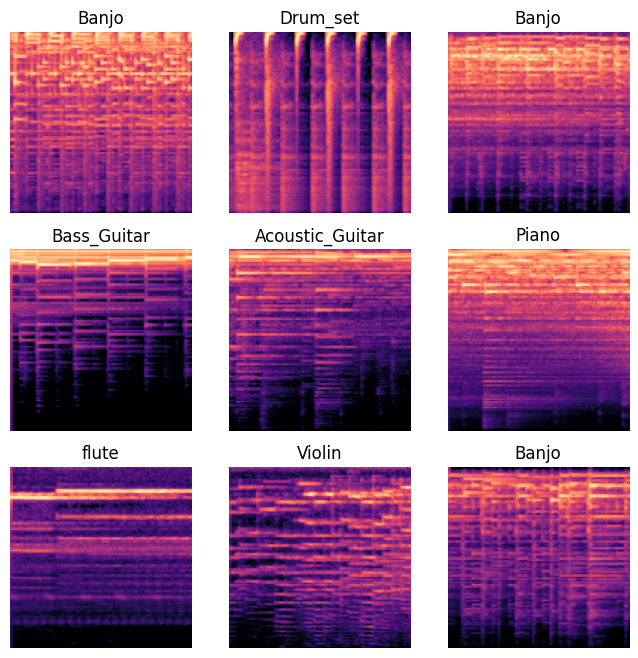

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].squeeze(), cmap='magma')
    plt.axis("off")
    label_index = np.argmax(y_train[i])
    plt.title(class_mapping[label_index])

plt.show()


task 1 - identify the no.of classes

task 2 - design cnn architecture

task 3- add regularization

task 4 - add fully connected layer

task 5- add output layer

task 6 - build and verify te model

In [10]:
import numpy as np

BASE_PATH = "/content/drive/MyDrive/InstruNetAI"

X = np.load(BASE_PATH + "/X.npy")
y = np.load(BASE_PATH + "/y.npy")
labels = np.load(BASE_PATH + "/labels.npy", allow_pickle=True)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Labels:", labels)

NUM_CLASSES = len(labels)
print("Number of classes:", NUM_CLASSES)


X shape: (42311, 128, 128, 1)
y shape: (42311, 28)
Labels: ['Accordion' 'Acoustic_Guitar' 'Banjo' 'Bass_Guitar' 'Clarinet' 'Cymbals'
 'Dobro' 'Drum_set' 'Electro_Guitar' 'Floor_Tom' 'Harmonica' 'Harmonium'
 'Hi_Hats' 'Horn' 'Keyboard' 'Mandolin' 'Organ' 'Piano' 'Saxophone'
 'Shakers' 'Tambourine' 'Trombone' 'Trumpet' 'Ukulele' 'Violin' 'cowbell'
 'flute' 'vibraphone']
Number of classes: 28


In [11]:
IMG_HEIGHT = X.shape[1]
IMG_WIDTH = X.shape[2]


In [12]:
BATCH_SIZE = 32
CHANNELS = X.shape[3]
EPOCHS = 20

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])


Training samples: 33848
Validation samples: 8463


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [15]:
model = Sequential()

# Convolution Block 1
model.add(Conv2D(32, (3,3), activation='relu',
                 input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)))
model.add(MaxPooling2D((2,2)))

# Convolution Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Convolution Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(NUM_CLASSES, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,307,676 (12.62 MB)

 Trainable params: 3,307,676 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    loss='categorical_crossentropy', # Changed from sparse_categorical_crossentropy
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=BATCH_SIZE
)


Epoch 1/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.5665 - loss: 5.3964 - val_accuracy: 0.9045 - val_loss: 0.3114
Epoch 2/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9308 - loss: 0.2388 - val_accuracy: 0.9465 - val_loss: 0.1904
Epoch 3/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9652 - loss: 0.1238 - val_accuracy: 0.9536 - val_loss: 0.2047
Epoch 4/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9756 - loss: 0.0966 - val_accuracy: 0.9534 - val_loss: 0.2202
Epoch 5/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9791 - loss: 0.1000 - val_accuracy: 0.9630 - val_loss: 0.2153
Epoch 6/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9836 - loss: 0.0849 - val_accuracy: 0.9594 - val_loss: 0.2769
Epoch 7/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9837 - loss: 0.1021 - val_accuracy: 0.9486 - val_loss: 0.6044
Epoch 8/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9843 -

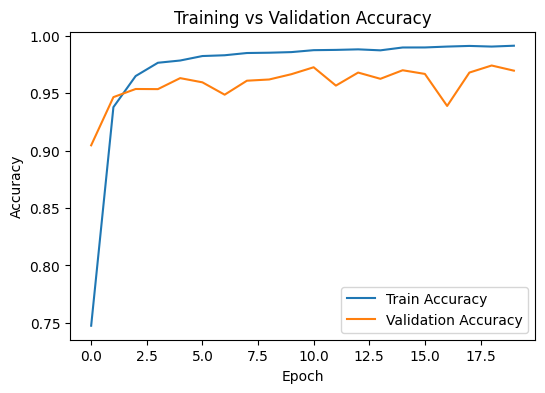

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


In [20]:
print(
    "Final Training Accuracy:", history.history['accuracy'][-1],
    "\nFinal Validation Accuracy:", history.history['val_accuracy'][-1]
)


Final Training Accuracy: 0.9912254810333252 
Final Validation Accuracy: 0.9695143699645996


1.record final metrics

2.calculate accuracy gap

3.plot accuracy curves

4.plot loss curves

5.generate confusion matrix

6.now do class wise performance analysis

7.identify misclassified spectrograms

8.check overfitting

In [21]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]


In [22]:
accuracy_gap = final_train_acc - final_val_acc
print("Accuracy Gap:", accuracy_gap)


Accuracy Gap: 0.021711111068725586


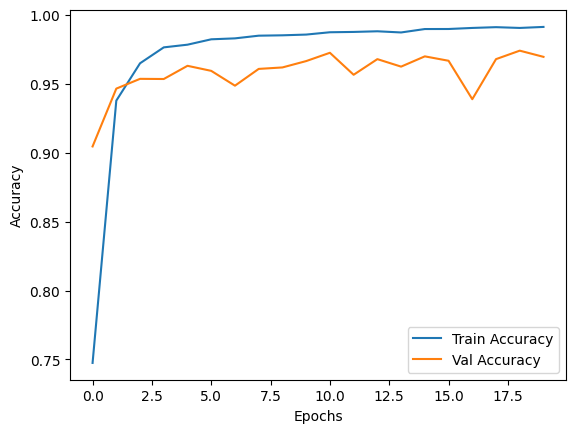

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


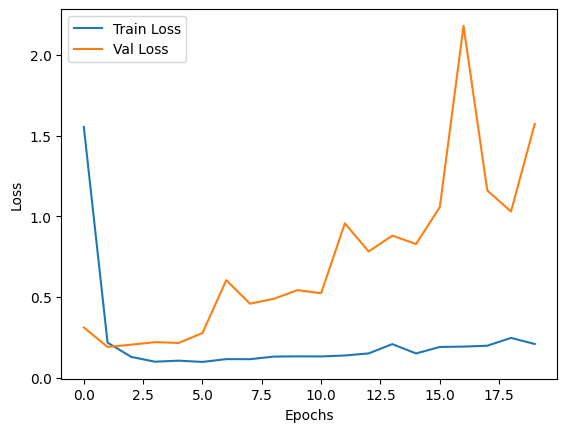

In [24]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [25]:
# Convert one-hot to class indices
y_val_labels = np.argmax(y_val, axis=1)


265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


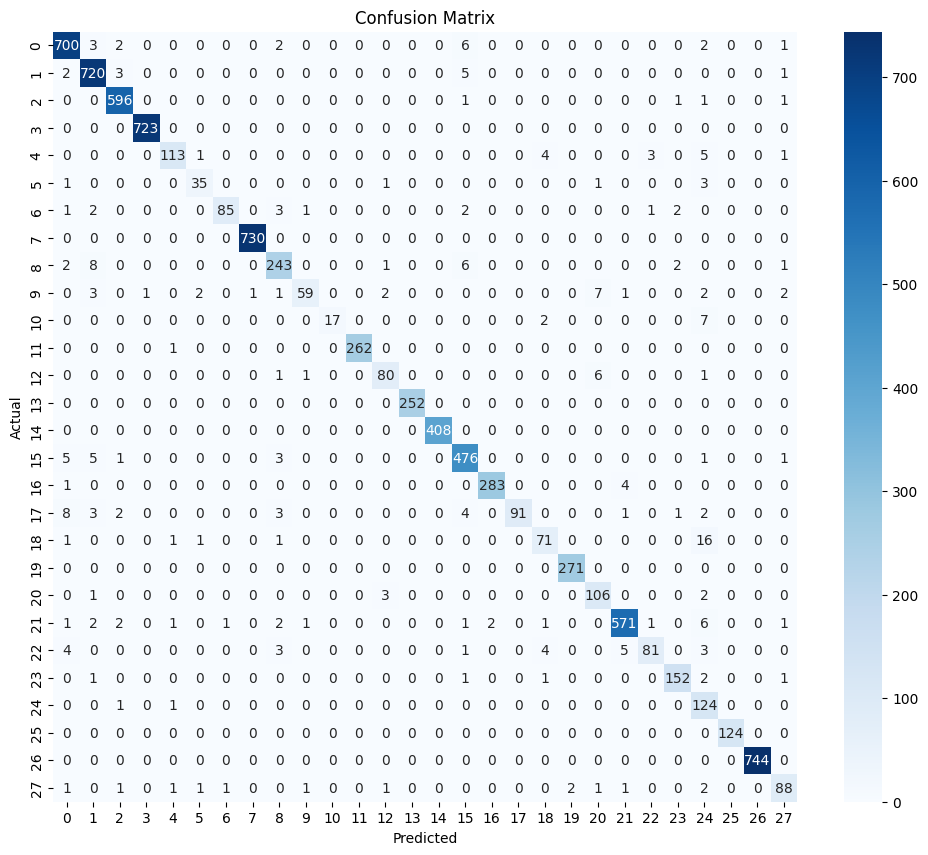

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict
y_pred = np.argmax(model.predict(X_val), axis=1)

# Convert one-hot y_val
y_val_labels = np.argmax(y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_val_labels, y_pred)

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
import numpy as np

# Correct: load the .npy file
class_names = np.load("/content/drive/MyDrive/InstruNetAI/labels.npy", allow_pickle=True)

# Check the content
print(class_names)


['Accordion' 'Acoustic_Guitar' 'Banjo' 'Bass_Guitar' 'Clarinet' 'Cymbals'
 'Dobro' 'Drum_set' 'Electro_Guitar' 'Floor_Tom' 'Harmonica' 'Harmonium'
 'Hi_Hats' 'Horn' 'Keyboard' 'Mandolin' 'Organ' 'Piano' 'Saxophone'
 'Shakers' 'Tambourine' 'Trombone' 'Trumpet' 'Ukulele' 'Violin' 'cowbell'
 'flute' 'vibraphone']


In [28]:
from sklearn.metrics import classification_report

# y_val_labels: true labels
# y_pred: predicted labels
print(classification_report(y_val_labels, y_pred, target_names=list(class_names)))


                 precision    recall  f1-score   support

      Accordion       0.96      0.98      0.97       716
Acoustic_Guitar       0.96      0.98      0.97       731
          Banjo       0.98      0.99      0.99       600
    Bass_Guitar       1.00      1.00      1.00       723
       Clarinet       0.96      0.89      0.92       127
        Cymbals       0.88      0.85      0.86        41
          Dobro       0.98      0.88      0.92        97
       Drum_set       1.00      1.00      1.00       730
 Electro_Guitar       0.93      0.92      0.93       263
      Floor_Tom       0.94      0.73      0.82        81
      Harmonica       1.00      0.65      0.79        26
      Harmonium       1.00      1.00      1.00       263
        Hi_Hats       0.91      0.90      0.90        89
           Horn       1.00      1.00      1.00       252
       Keyboard       1.00      1.00      1.00       408
       Mandolin       0.95      0.97      0.96       492
          Organ       0.99    

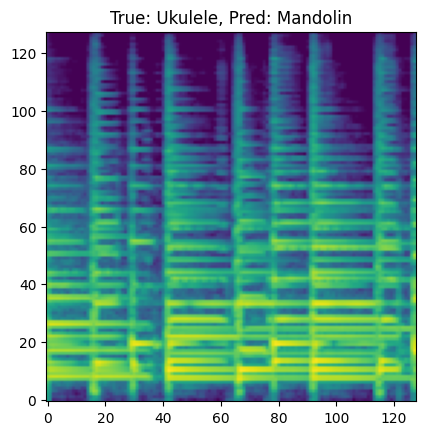

In [29]:
mis_idx = np.where(y_val_labels != y_pred)[0]

plt.imshow(X_val[mis_idx[0]].squeeze(), origin='lower')
plt.title(f"True: {labels[y_val_labels[mis_idx[0]]]}, Pred: {labels[y_pred[mis_idx[0]]]}")
plt.show()

In [30]:
if accuracy_gap > 0.1:
    print("⚠️ Model may be overfitting")
else:
    print("✅ Model generalizes well")


✅ Model generalizes well


Choose only one of the following strategies:

Adjust learning rate

Increase or decrease number of epochs

Modify dropout value

Improve data augmentation

Apply class balancing technique

Do not apply more than one change.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

NUM_CLASSES = len(class_names)
INPUT_SHAPE = X_train.shape[1:]  # e.g., (128,128,3)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=INPUT_SHAPE),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,307,676 (12.62 MB)

 Trainable params: 3,307,676 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.optimizers import Adam

# Adjust learning rate (example: reduce to 0.0005)
optimizer = Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [33]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.6742 - loss: 1.8662 - val_accuracy: 0.8859 - val_loss: 0.3729
Epoch 2/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9266 - loss: 0.2468 - val_accuracy: 0.9386 - val_loss: 0.2064
Epoch 3/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9584 - loss: 0.1396 - val_accuracy: 0.9416 - val_loss: 0.1972
Epoch 4/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9679 - loss: 0.1016 - val_accuracy: 0.9571 - val_loss: 0.1453
Epoch 5/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9783 - loss: 0.0684 - val_accuracy: 0.9497 - val_loss: 0.1715
Epoch 6/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9816 - loss: 0.0600 - val_accuracy: 0.9636 - val_loss: 0.1332
Epoch 7/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9860 - loss: 0.0433 - val_accuracy: 0.9636 - val_loss: 0.1370
Epoch 8/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9797 -

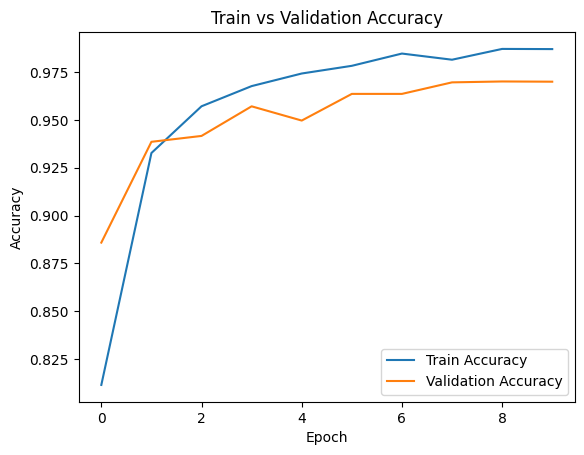

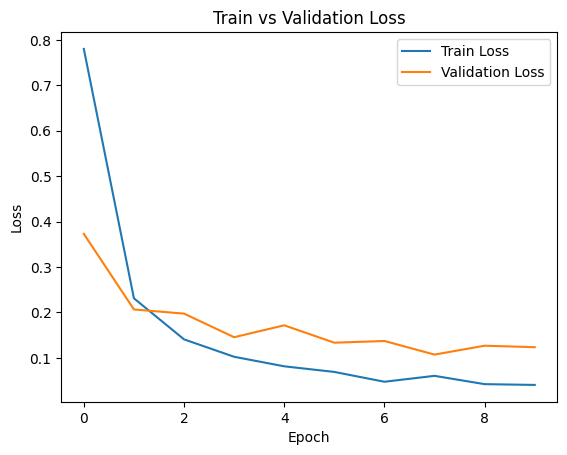

Final Training Accuracy: 0.9870
Final Validation Accuracy: 0.9700


In [34]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

# Print final metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


1.select best model (if you have multiples versions)

2.final evaluation on validation test

3.generate confusion matrix

4.now compute class wise metrics

5.analyze errors

6.save and record the final observation

In [35]:
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9669 - loss: 0.1506
Validation Loss: 0.1233
Validation Accuracy: 0.9700


265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


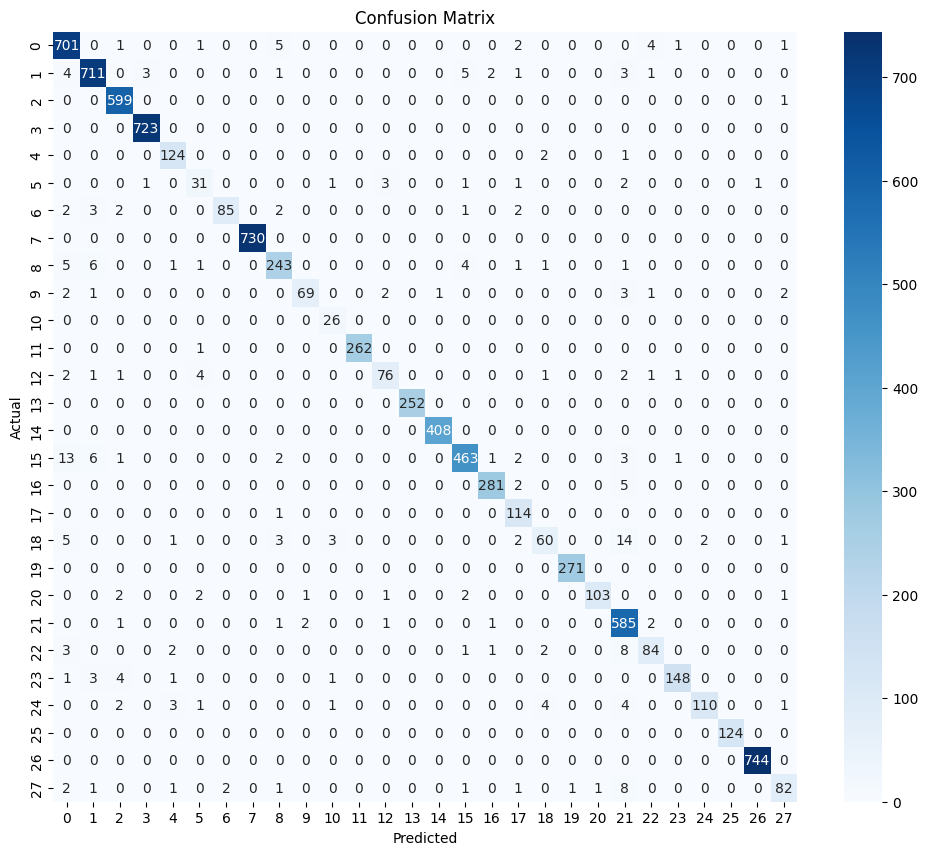

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict classes
y_pred = np.argmax(model.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [37]:
from sklearn.metrics import classification_report

# Load class names
class_names = np.load("/content/drive/MyDrive/InstruNetAI/labels.npy", allow_pickle=True)

report = classification_report(y_true, y_pred, target_names=list(class_names))
print(report)


                 precision    recall  f1-score   support

      Accordion       0.95      0.98      0.96       716
Acoustic_Guitar       0.97      0.97      0.97       731
          Banjo       0.98      1.00      0.99       600
    Bass_Guitar       0.99      1.00      1.00       723
       Clarinet       0.93      0.98      0.95       127
        Cymbals       0.76      0.76      0.76        41
          Dobro       0.98      0.88      0.92        97
       Drum_set       1.00      1.00      1.00       730
 Electro_Guitar       0.94      0.92      0.93       263
      Floor_Tom       0.96      0.85      0.90        81
      Harmonica       0.81      1.00      0.90        26
      Harmonium       1.00      1.00      1.00       263
        Hi_Hats       0.92      0.85      0.88        89
           Horn       1.00      1.00      1.00       252
       Keyboard       1.00      1.00      1.00       408
       Mandolin       0.97      0.94      0.95       492
          Organ       0.98    

Number of misclassified samples: 254


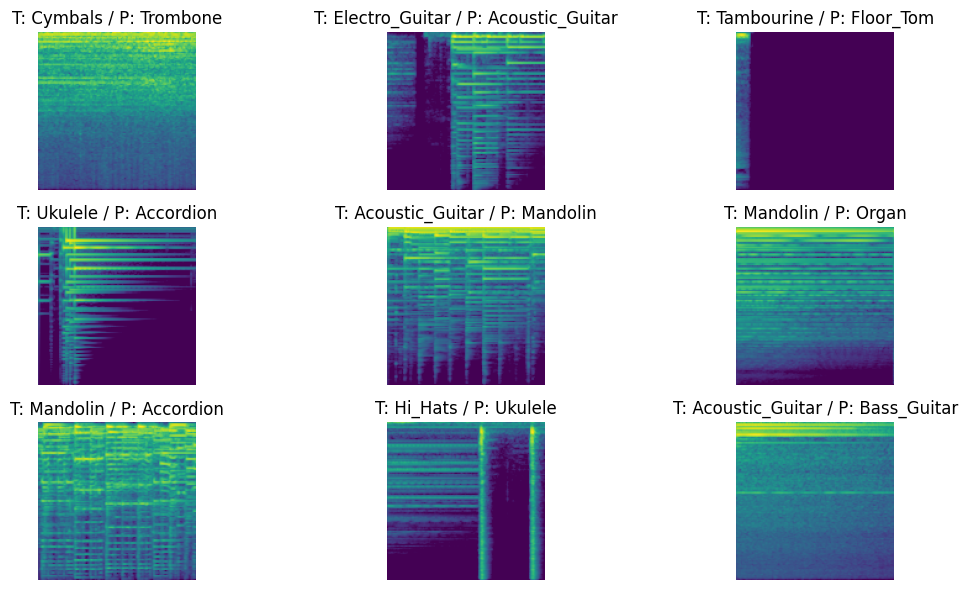

In [38]:
# Find misclassified indices
misclassified_idx = np.where(y_true != y_pred)[0]
print(f"Number of misclassified samples: {len(misclassified_idx)}")

# Show some misclassified spectrograms
plt.figure(figsize=(12,6))
for i, idx in enumerate(misclassified_idx[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_val[idx])
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred[idx]]
    plt.title(f"T: {true_label} / P: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [39]:
final_observations = {
    "Validation Accuracy": float(val_accuracy),
    "Validation Loss": float(val_loss),
    "Misclassified Samples": int(len(misclassified_idx)),
    "Class-wise Report": report
}

# Save to JSON
import json
with open("/content/drive/MyDrive/InstruNetAI/final_evaluation.json", "w") as f:
    json.dump(final_observations, f, indent=4)

print("Final evaluation saved as JSON!")


Final evaluation saved as JSON!


**Milestone3**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [41]:
X = np.load("/content/drive/MyDrive/InstruNetAI/X.npy")
y = np.load("/content/drive/MyDrive/InstruNetAI/y.npy")
labels = np.load("/content/drive/MyDrive/InstruNetAI/labels.npy", allow_pickle=True)
labels = list(labels)


Class distribution:

Accordion : 3581
Acoustic_Guitar : 3654
Banjo : 2998
Bass_Guitar : 3613
Clarinet : 634
Cymbals : 208
Dobro : 487
Drum_set : 3648
Electro_Guitar : 1316
Floor_Tom : 406
Harmonica : 131
Harmonium : 1314
Hi_Hats : 444
Horn : 1258
Keyboard : 2041
Mandolin : 2458
Organ : 1442
Piano : 575
Saxophone : 454
Shakers : 1357
Tambourine : 558
Trombone : 2965
Trumpet : 503
Ukulele : 790
Violin : 630
cowbell : 621
flute : 3719
vibraphone : 506


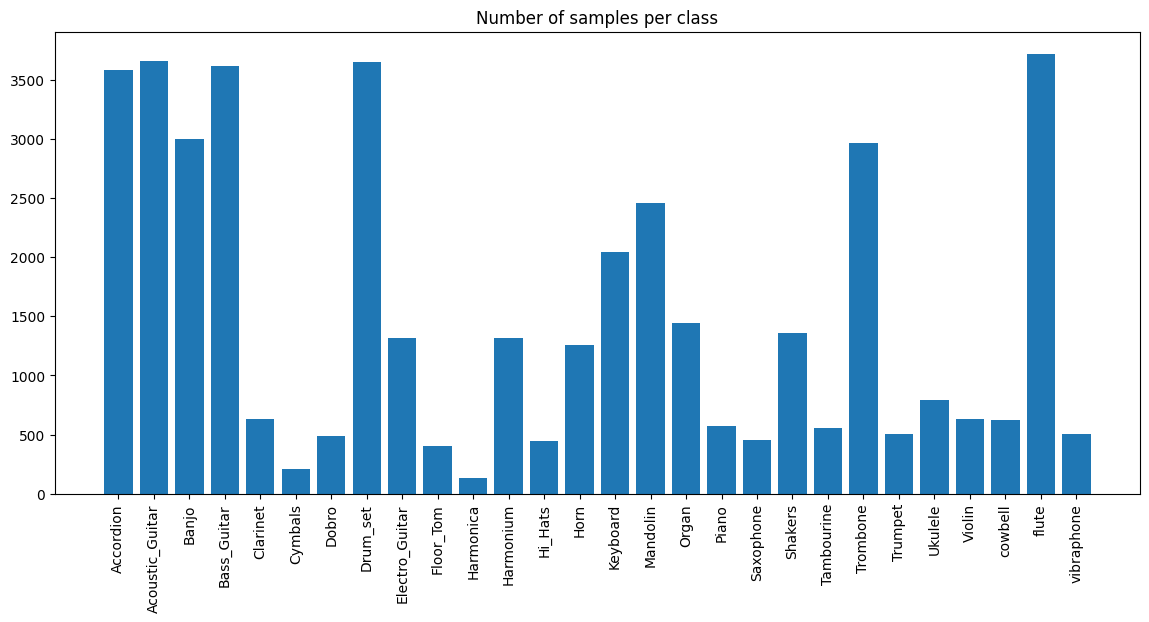

In [42]:
class_counts = Counter(np.argmax(y, axis=1))

print("Class distribution:\n")
for cls, count in class_counts.items():
    print(f"{labels[cls]} : {count}")

# Plot
plt.figure(figsize=(14,6))
plt.bar(labels, [class_counts[i] for i in range(len(labels))])
plt.xticks(rotation=90)
plt.title("Number of samples per class")
plt.show()

In [43]:
y_val_labels = np.argmax(y_val, axis=1)
y_pred = np.argmax(model.predict(X_val), axis=1)


265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [44]:
print(classification_report(y_val_labels, y_pred, target_names=labels))


                 precision    recall  f1-score   support

      Accordion       0.95      0.98      0.96       716
Acoustic_Guitar       0.97      0.97      0.97       731
          Banjo       0.98      1.00      0.99       600
    Bass_Guitar       0.99      1.00      1.00       723
       Clarinet       0.93      0.98      0.95       127
        Cymbals       0.76      0.76      0.76        41
          Dobro       0.98      0.88      0.92        97
       Drum_set       1.00      1.00      1.00       730
 Electro_Guitar       0.94      0.92      0.93       263
      Floor_Tom       0.96      0.85      0.90        81
      Harmonica       0.81      1.00      0.90        26
      Harmonium       1.00      1.00      1.00       263
        Hi_Hats       0.92      0.85      0.88        89
           Horn       1.00      1.00      1.00       252
       Keyboard       1.00      1.00      1.00       408
       Mandolin       0.97      0.94      0.95       492
          Organ       0.98    

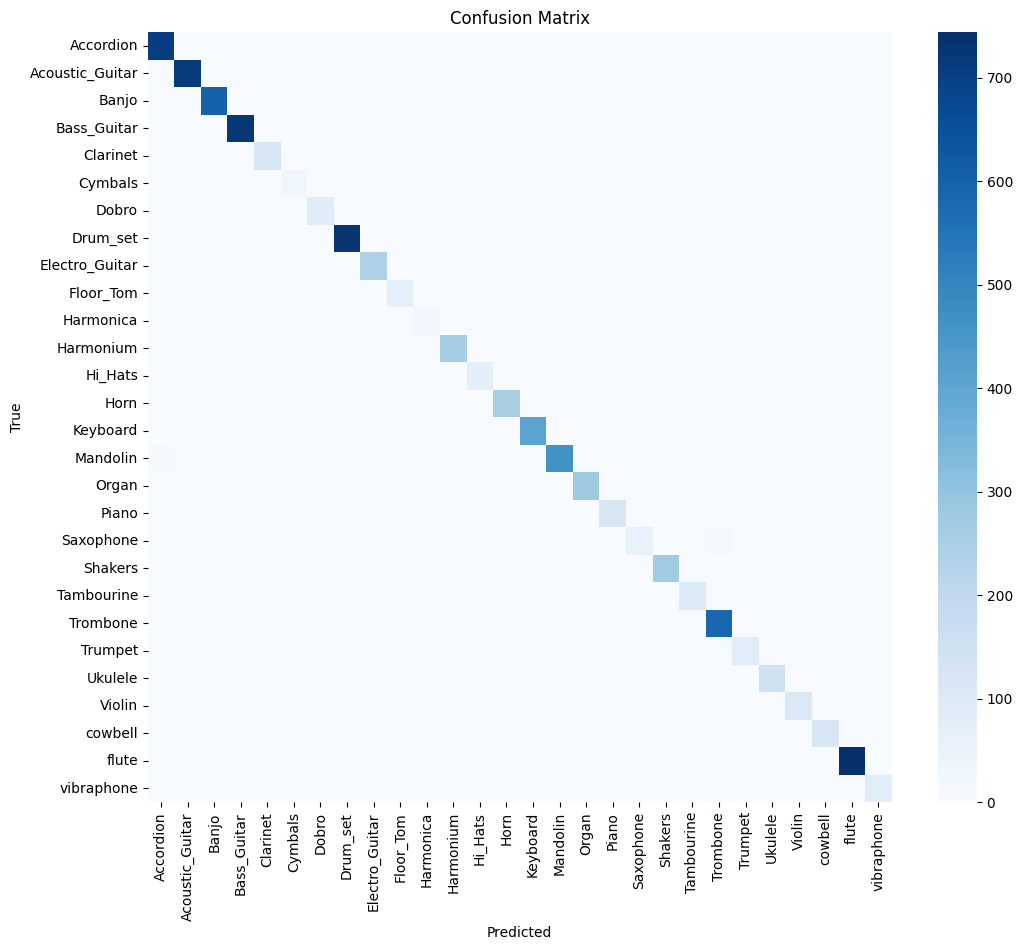

In [45]:
cm = confusion_matrix(y_val_labels, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


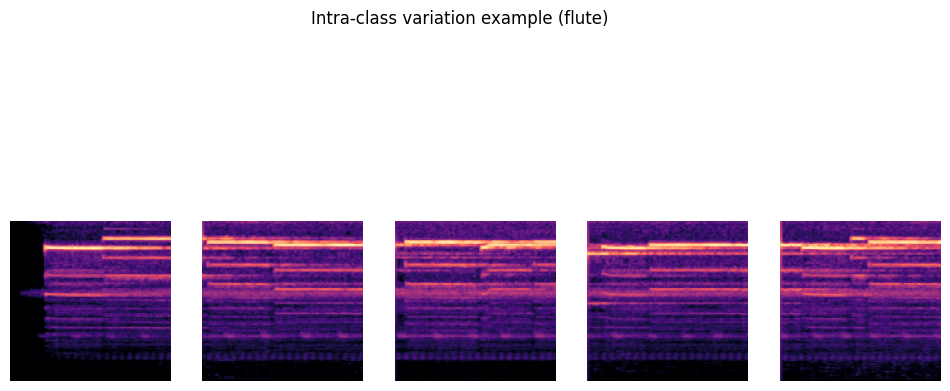

In [46]:
instrument_index = labels.index("flute")   # change instrument name
indices = np.where(np.argmax(y, axis=1) == instrument_index)[0][:5]

plt.figure(figsize=(12,6))
for i, idx in enumerate(indices):
    plt.subplot(1,5,i+1)
    plt.imshow(X[idx].squeeze(), cmap="magma")
    plt.axis("off")
plt.suptitle("Intra-class variation example (flute)")
plt.show()

In [47]:
bad = []

for i in range(len(X)):
    if X[i].max() == 0 or np.isnan(X[i]).any():
        bad.append(i)

print("Possible noisy / broken samples:", len(bad))


Possible noisy / broken samples: 41614


In [48]:
print("Total classes:", len(labels))
print("Most frequent class:", labels[max(class_counts, key=class_counts.get)])
print("Least frequent class:", labels[min(class_counts, key=class_counts.get)])

gap = max(class_counts.values()) - min(class_counts.values())
print("Imbalance gap:", gap)


Total classes: 28
Most frequent class: flute
Least frequent class: Harmonica
Imbalance gap: 3588


In [49]:
y_true = np.argmax(y_val, axis=1)
y_pred = np.argmax(model.predict(X_val), axis=1)


265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [50]:
mis_idx = np.where(y_true != y_pred)[0]

print("Total misclassified:", len(mis_idx))
print("\nFirst 10 misclassified indices:")
for i in mis_idx[:10]:
    print(f"Index: {i}, True: {labels[y_true[i]]}, Predicted: {labels[y_pred[i]]}")


Total misclassified: 254

First 10 misclassified indices:
Index: 16, True: Cymbals, Predicted: Trombone
Index: 54, True: Electro_Guitar, Predicted: Acoustic_Guitar
Index: 71, True: Tambourine, Predicted: Floor_Tom
Index: 80, True: Ukulele, Predicted: Accordion
Index: 89, True: Acoustic_Guitar, Predicted: Mandolin
Index: 166, True: Mandolin, Predicted: Organ
Index: 177, True: Mandolin, Predicted: Accordion
Index: 233, True: Hi_Hats, Predicted: Ukulele
Index: 241, True: Acoustic_Guitar, Predicted: Bass_Guitar
Index: 256, True: Trumpet, Predicted: Mandolin


In [51]:
mis_samples = mis_idx[:10]


In [52]:
errors = []

for i in mis_samples:
    errors.append((labels[y_true[i]], labels[y_pred[i]]))

print(errors)


[(np.str_('Cymbals'), np.str_('Trombone')), (np.str_('Electro_Guitar'), np.str_('Acoustic_Guitar')), (np.str_('Tambourine'), np.str_('Floor_Tom')), (np.str_('Ukulele'), np.str_('Accordion')), (np.str_('Acoustic_Guitar'), np.str_('Mandolin')), (np.str_('Mandolin'), np.str_('Organ')), (np.str_('Mandolin'), np.str_('Accordion')), (np.str_('Hi_Hats'), np.str_('Ukulele')), (np.str_('Acoustic_Guitar'), np.str_('Bass_Guitar')), (np.str_('Trumpet'), np.str_('Mandolin'))]


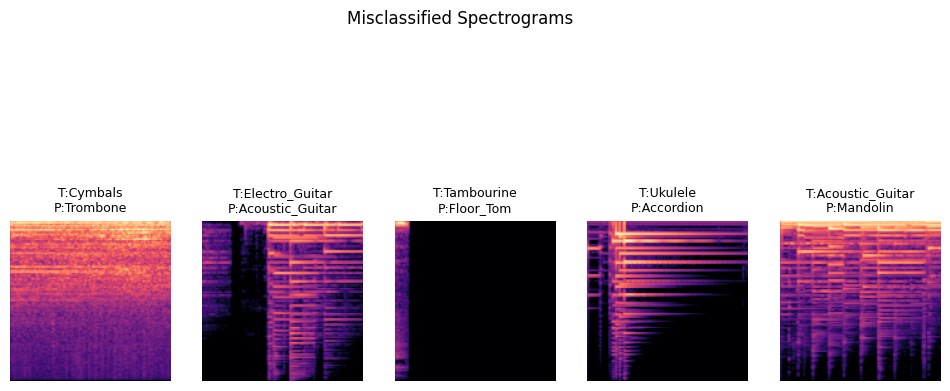

In [53]:
plt.figure(figsize=(12,6))

for i, idx in enumerate(mis_samples[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(X_val[idx].squeeze(), cmap="magma")
    plt.title(f"T:{labels[y_true[idx]]}\nP:{labels[y_pred[idx]]}", fontsize=9)
    plt.axis("off")

plt.suptitle("Misclassified Spectrograms")
plt.show()


In [54]:
for i in mis_samples[:10]:
    print(f"True: {labels[y_true[i]]}, Predicted: {labels[y_pred[i]]}")


True: Cymbals, Predicted: Trombone
True: Electro_Guitar, Predicted: Acoustic_Guitar
True: Tambourine, Predicted: Floor_Tom
True: Ukulele, Predicted: Accordion
True: Acoustic_Guitar, Predicted: Mandolin
True: Mandolin, Predicted: Organ
True: Mandolin, Predicted: Accordion
True: Hi_Hats, Predicted: Ukulele
True: Acoustic_Guitar, Predicted: Bass_Guitar
True: Trumpet, Predicted: Mandolin


In [55]:
correct_idx = np.where(y_true == y_pred)[0]

same_class = []

for idx in correct_idx:
    if labels[y_true[idx]] == labels[y_true[mis_samples[0]]]:
        same_class.append(idx)

same_class = same_class[:3]


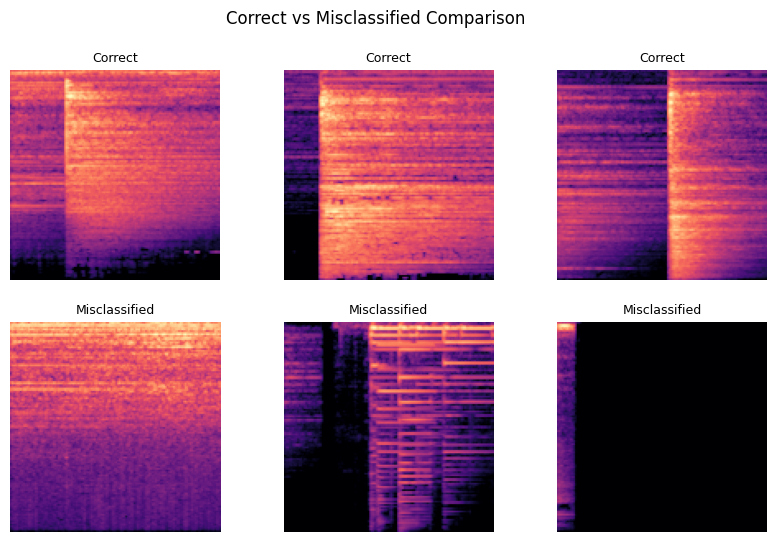

In [56]:
plt.figure(figsize=(10,6))

for i, idx in enumerate(same_class):
    plt.subplot(2,3,i+1)
    plt.imshow(X_val[idx].squeeze(), cmap="magma")
    plt.title("Correct", fontsize=9)
    plt.axis("off")

for i, idx in enumerate(mis_samples[:3]):
    plt.subplot(2,3,i+4)
    plt.imshow(X_val[idx].squeeze(), cmap="magma")
    plt.title("Misclassified", fontsize=9)
    plt.axis("off")

plt.suptitle("Correct vs Misclassified Comparison")
plt.show()


In [57]:
from collections import Counter

pair_errors = [(labels[y_true[i]], labels[y_pred[i]]) for i in mis_idx]

print("\nMost common mistake pairs:")
print(Counter(pair_errors).most_common(5))



Most common mistake pairs:
[((np.str_('Saxophone'), np.str_('Trombone')), 14), ((np.str_('Mandolin'), np.str_('Accordion')), 13), ((np.str_('Trumpet'), np.str_('Trombone')), 8), ((np.str_('vibraphone'), np.str_('Trombone')), 8), ((np.str_('Electro_Guitar'), np.str_('Acoustic_Guitar')), 6)]


In [58]:
import numpy as np

# load previous labels
labels = np.load("/content/drive/MyDrive/InstruNetAI/labels.npy", allow_pickle=True)

# unique class names
unique_labels = sorted(list(set(labels)))
num_classes = len(unique_labels)

print("Number of classes:", num_classes)
print("Label order:", unique_labels)

# map instrument → index
label_index = {label: i for i, label in enumerate(unique_labels)}

# convert to binary vectors
binary_labels = []

for lbl in labels:
    vec = np.zeros(num_classes)
    vec[label_index[lbl]] = 1
    binary_labels.append(vec)

binary_labels = np.array(binary_labels)

np.save("/content/drive/MyDrive/InstruNetAI/y_multi.npy", binary_labels)

print("Example vector:", binary_labels[0])

Number of classes: 28
Label order: [np.str_('Accordion'), np.str_('Acoustic_Guitar'), np.str_('Banjo'), np.str_('Bass_Guitar'), np.str_('Clarinet'), np.str_('Cymbals'), np.str_('Dobro'), np.str_('Drum_set'), np.str_('Electro_Guitar'), np.str_('Floor_Tom'), np.str_('Harmonica'), np.str_('Harmonium'), np.str_('Hi_Hats'), np.str_('Horn'), np.str_('Keyboard'), np.str_('Mandolin'), np.str_('Organ'), np.str_('Piano'), np.str_('Saxophone'), np.str_('Shakers'), np.str_('Tambourine'), np.str_('Trombone'), np.str_('Trumpet'), np.str_('Ukulele'), np.str_('Violin'), np.str_('cowbell'), np.str_('flute'), np.str_('vibraphone')]
Example vector: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = binary_labels.shape[1]

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=X_train.shape[1:]),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(num_classes, activation="softmax")   # 👈 IMPORTANT
])


In [62]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [63]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32
)


Epoch 1/15
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.6626 - loss: 3.7655 - val_accuracy: 0.8968 - val_loss: 0.3459
Epoch 2/15
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.8902 - loss: 0.3679 - val_accuracy: 0.9308 - val_loss: 0.2381
Epoch 3/15
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9250 - loss: 0.2459 - val_accuracy: 0.9349 - val_loss: 0.2270
Epoch 4/15
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9453 - loss: 0.1771 - val_accuracy: 0.9495 - val_loss: 0.1842
Epoch 5/15
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9527 - loss: 0.1548 - val_accuracy: 0.9409 - val_loss: 0.2171
Epoch 6/15
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9530 - loss: 0.1561 - val_accuracy: 0.9513 - val_loss: 0.2036
Epoch 7/15
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9655 - loss: 0.1191 - val_accuracy: 0.9534 - val_loss: 0.1866
Epoch 8/15
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9737 -

In [64]:
probs = model.predict(X_val[:5])
print(probs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
[[2.12719407e-08 1.03322932e-08 1.04544316e-11 4.44106240e-19
  2.52045156e-11 8.08133365e-08 3.55625043e-11 6.72749611e-20
  1.81958101e-10 7.73923148e-11 1.17488647e-13 7.04101365e-17
  4.84503238e-09 2.72952355e-11 7.59735428e-13 1.36954748e-09
  2.45224830e-04 6.90130889e-03 2.19057029e-06 1.95905168e-14
  5.77012661e-16 9.92847800e-01 3.65378483e-09 2.05541947e-14
  1.89633265e-09 6.02221219e-20 4.24307915e-11 3.26869645e-06]
 [2.34306054e-33 1.71654785e-27 1.50427655e-26 2.38104753e-26
  3.20931739e-21 3.76924544e-28 1.41895482e-41 5.54914192e-43
  5.46156637e-36 2.90166492e-30 5.42884669e-30 5.06367468e-39
  1.43478436e-24 1.00000000e+00 0.00000000e+00 3.53817443e-30
  2.05539933e-23 3.22848204e-23 3.27946107e-23 8.12010421e-41
  1.94513019e-30 1.35153505e-26 8.46078358e-28 1.78496378e-32
  5.04254583e-25 1.40129846e-45 3.93268934e-23 7.27269604e-15]
 [1.49410468e-07 1.09687259e-09 2.52258067e-12 7.62694012e-14
  2.83792629e-14 8.10663114e-

In [65]:
threshold = 0.5
predictions = (probs > threshold).astype(int)
print(predictions)


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss

y_pred = (model.predict(X_val) > 0.5).astype(int)

print("Precision:", precision_score(y_val, y_pred, average='macro'))
print("Recall:", recall_score(y_val, y_pred, average='macro'))
print("Macro F1:", f1_score(y_val, y_pred, average='macro'))
print("Hamming Loss:", hamming_loss(y_val, y_pred))


265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Precision: 0.9377459470999162
Recall: 0.8802931242775978
Macro F1: 0.9030321778148763
Hamming Loss: 0.00336760014179369


Task 1: Implement the Selected

Strategy

you have to implement Strategy

selected previously:

Feature enhancement

Longer audio segments

Data cleaning

Learning-rate fine-tuning

Task 2: Retrain the Model

Train the model with:

Same architecture

Same dataset split

Record:

Training accuracy

Validation accuracy

Validation loss

Task 3: Evaluate on Test Set

Evaluate final model on test data
Record:

Test accuracy

Class-wise metrics

Task 4: Compare with Baseline

Create a small comparison:

Milestone-2 baseline

Milestone-3 final model

Mention:

What improved

What stayed the same

Task 5: Final Model Save:

Model file

Label mapping

Training history

In [67]:
import librosa
import numpy as np

def extract_features(path, n_mels=128):
    y, sr = librosa.load(path, duration=4.0, mono=True)

    mel = librosa.feature.melspectrogram(
        y=y, sr=sr, n_mels=n_mels, n_fft=2048, hop_length=512
    )

    mel_db = librosa.power_to_db(mel, ref=np.max)

    mel_db = (mel_db - mel_db.mean()) / (mel_db.std() + 1e-8)

    return mel_db


In [68]:
AUDIO_PATH = "/content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Electro_Guitar"
import os
path = os.path.join(AUDIO_PATH, os.listdir(AUDIO_PATH)[0])
y, sr = librosa.load(path, duration=5.0, mono=True)

In [69]:
import numpy as np

BASE_PATH = "/content/drive/MyDrive/InstruNetAI"
X = np.load(BASE_PATH + "/X.npy")
y = np.load(BASE_PATH + "/y.npy")

clean_X = []
clean_y = []

for i in range(len(X)):
    if X[i].max() == 0:   # silent
        continue
    if np.isnan(X[i]).any():
        continue
    clean_X.append(X[i])
    clean_y.append(y[i])

X = np.array(clean_X)
y = np.array(clean_y)


In [70]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

optimizer = Adam(learning_rate=0.001)

lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)


In [71]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32,
    callbacks=[lr_scheduler]
)


Epoch 1/25
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9807 - loss: 0.0711 - val_accuracy: 0.9576 - val_loss: 0.2605 - learning_rate: 0.0010
Epoch 2/25
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9825 - loss: 0.0653 - val_accuracy: 0.9533 - val_loss: 0.2956 - learning_rate: 0.0010
Epoch 3/25
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9826 - loss: 0.0643 - val_accuracy: 0.9559 - val_loss: 0.2915 - learning_rate: 0.0010
Epoch 4/25
1057/1058 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9826 - loss: 0.0628
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9826 - loss: 0.0628 - val_accuracy: 0.9518 - val_loss: 0.3241 - learning_rate: 0.0010
Epoch 5/25
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9899 - loss: 0.0442 - val_accuracy: 0.9634 - val_loss: 0.2525 - learning_rate: 5.0000e-04
Epoch 6/25
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accu

In [72]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print("Test Accuracy:", test_acc)


265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9683 - loss: 0.2730
Test Accuracy: 0.971523106098175


In [73]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)

print(classification_report(y_true_labels, y_pred_labels, target_names=labels))


265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
                 precision    recall  f1-score   support

      Accordion       0.97      0.98      0.98       716
Acoustic_Guitar       0.97      0.98      0.97       731
          Banjo       0.98      0.99      0.99       600
    Bass_Guitar       0.99      1.00      1.00       723
       Clarinet       0.95      0.95      0.95       127
        Cymbals       0.92      0.88      0.90        41
          Dobro       0.96      0.90      0.93        97
       Drum_set       1.00      1.00      1.00       730
 Electro_Guitar       0.96      0.90      0.93       263
      Floor_Tom       0.89      0.95      0.92        81
      Harmonica       0.88      0.85      0.86        26
      Harmonium       1.00      1.00      1.00       263
        Hi_Hats       0.93      0.92      0.93        89
           Horn       1.00      1.00      1.00       252
       Keyboard       1.00      1.00      1.00       408
       Mandolin       0.96      0.96      0.96

In [74]:
model.save("final_Singlelabel_cnn.h5")


In [75]:
import json

with open("label_map.json", "w") as f:
    json.dump(labels.tolist(), f)


In [76]:
import pickle

with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)


In [77]:
import numpy as np

train_acc = history.history['accuracy'][-1]
val_acc   = history.history['val_accuracy'][-1]

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=1)

print("Training Accuracy :", round(train_acc, 4))
print("Validation Accuracy:", round(val_acc, 4))
print("Test Accuracy     :", round(test_acc, 4))

# Accuracy gaps
gap_train_val = train_acc - val_acc
gap_val_test  = val_acc - test_acc

print("\nAccuracy Gaps:")
print("Train - Val Gap :", round(gap_train_val, 4))
print("Val - Test Gap  :", round(gap_val_test, 4))


265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9683 - loss: 0.2730
Training Accuracy : 0.9981
Validation Accuracy: 0.9715
Test Accuracy     : 0.9715

Accuracy Gaps:
Train - Val Gap : 0.0265
Val - Test Gap  : 0.0


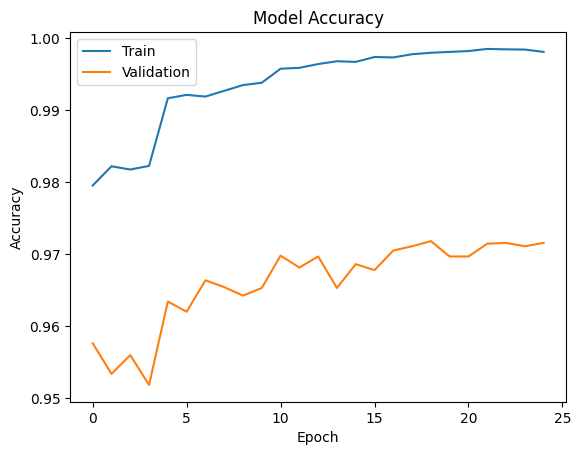

In [78]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


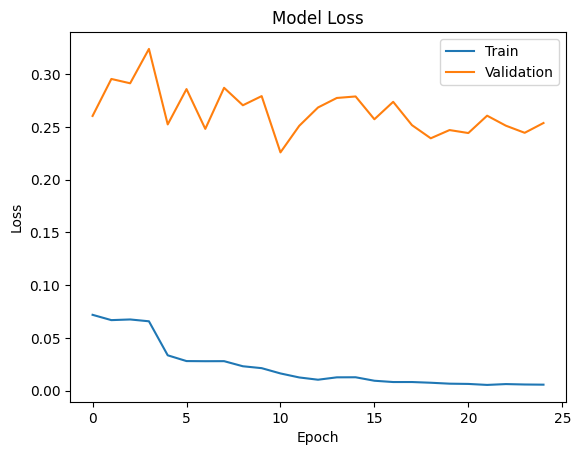

In [79]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()


In [80]:
MODEL_PATH = "/content/drive/MyDrive/InstruNetAI/final_cnn_model_m3.h5"

model.save(MODEL_PATH)
print("Final model saved at:", MODEL_PATH)


Final model saved at: /content/drive/MyDrive/InstruNetAI/final_cnn_model_m3.h5


In [81]:
import numpy as np

np.save("/content/drive/MyDrive/InstruNetAI/labels_m3.npy", labels)
print("Label file saved!")


Label file saved!


265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


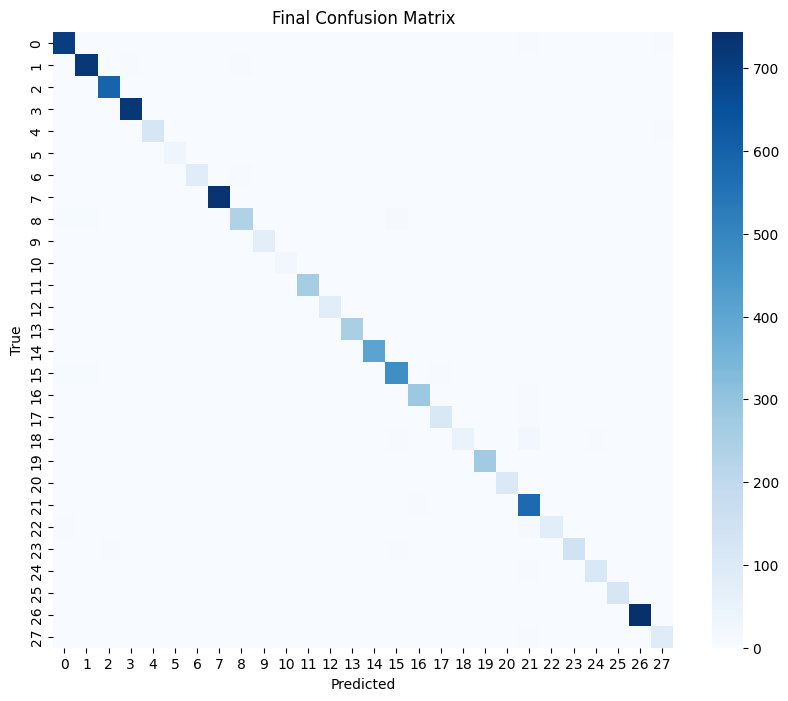

In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1) # Use X_val instead of X_test
y_true = np.argmax(y_val, axis=1) # Use y_val instead of y_test

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap="Blues")
plt.title("Final Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=labels))


                 precision    recall  f1-score   support

      Accordion       0.97      0.98      0.98       716
Acoustic_Guitar       0.97      0.98      0.97       731
          Banjo       0.98      0.99      0.99       600
    Bass_Guitar       0.99      1.00      1.00       723
       Clarinet       0.95      0.95      0.95       127
        Cymbals       0.92      0.88      0.90        41
          Dobro       0.96      0.90      0.93        97
       Drum_set       1.00      1.00      1.00       730
 Electro_Guitar       0.96      0.90      0.93       263
      Floor_Tom       0.89      0.95      0.92        81
      Harmonica       0.88      0.85      0.86        26
      Harmonium       1.00      1.00      1.00       263
        Hi_Hats       0.93      0.92      0.93        89
           Horn       1.00      1.00      1.00       252
       Keyboard       1.00      1.00      1.00       408
       Mandolin       0.96      0.96      0.96       492
          Organ       0.99    

In [84]:
mis_idx = np.where(y_true != y_pred)[0]

print("Total misclassified samples:", len(mis_idx))
print("Showing first 10 misclassified samples:")

for i in mis_idx[:10]:
    print(f"True: {labels[y_true[i]]} → Predicted: {labels[y_pred[i]]}")


Total misclassified samples: 241
Showing first 10 misclassified samples:
True: Electro_Guitar → Predicted: Accordion
True: Mandolin → Predicted: Acoustic_Guitar
True: Tambourine → Predicted: Floor_Tom
True: Saxophone → Predicted: Violin
True: Saxophone → Predicted: Accordion
True: Mandolin → Predicted: Piano
True: Trumpet → Predicted: Accordion
True: Acoustic_Guitar → Predicted: Bass_Guitar
True: Trumpet → Predicted: Accordion
True: Saxophone → Predicted: Trombone


In [85]:
results = {
    "train_acc": float(train_acc),
    "val_acc": float(val_acc),
    "test_acc": float(test_acc),
    "gap_train_val": float(gap_train_val),
    "gap_val_test": float(gap_val_test)
}

import json
with open("/content/drive/MyDrive/InstruNetAI/m3_results.json", "w") as f:
    json.dump(results, f, indent=4)

print("Results saved!")


Results saved!
